In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go

In [6]:
from plotly.offline import init_notebook_mode, iplot 
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [7]:
## read csv file
NewData = pd.read_csv("Glassdoor Gender Pay Gap (1).csv")
NewData.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [8]:
NewData['TotalSalary'] = NewData['BasePay'] + NewData['Bonus'] 

In [9]:
NewData.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalSalary
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [10]:
NewData.isnull().sum().sort_values(ascending=False)

TotalSalary    0
Bonus          0
BasePay        0
Seniority      0
Dept           0
Education      0
PerfEval       0
Age            0
Gender         0
JobTitle       0
dtype: int64

In [11]:
NewData.shape

(1000, 10)

In [12]:
NewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JobTitle     1000 non-null   object
 1   Gender       1000 non-null   object
 2   Age          1000 non-null   int64 
 3   PerfEval     1000 non-null   int64 
 4   Education    1000 non-null   object
 5   Dept         1000 non-null   object
 6   Seniority    1000 non-null   int64 
 7   BasePay      1000 non-null   int64 
 8   Bonus        1000 non-null   int64 
 9   TotalSalary  1000 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 78.2+ KB


In [13]:
#Getting all the unique professions 
uniqueProf = NewData['JobTitle'].unique()
uniqueProf

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

## EDA

### Age segmenation 

Text(0.5, 1.0, 'Age')

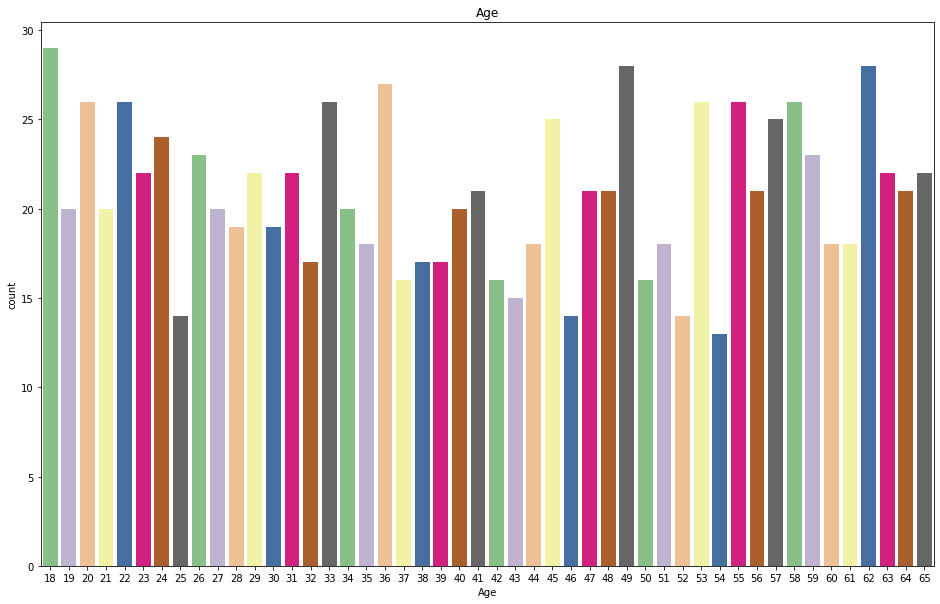

In [14]:
plt.figure(figsize=(16, 10))
sns.countplot (x= 'Age', palette='Accent', data= NewData).set_title ('Age')

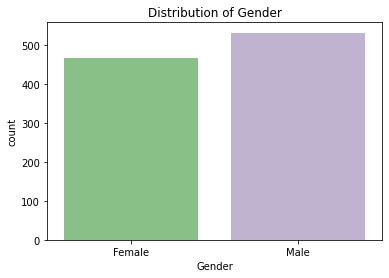

In [15]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender',palette='Accent', data=NewData);
plt.title('Distribution of Gender');

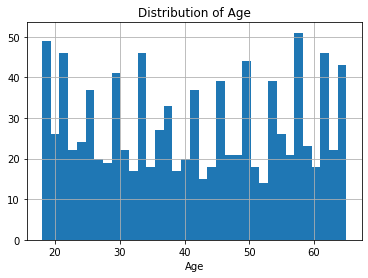

In [16]:
# Create a histogram of ages
NewData.hist('Age',bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

In [17]:
# plt.hist('Age', data=NewData[NewData['Gender'] == 'Male'], alpha=0.5, label='Male');
# plt.hist('Age', data=NewData[NewData['Gender'] == 'Female'], alpha=0.5, label='Female');
# plt.title('Distribution of Age by Gender');
# plt.xlabel('Age');
# plt.legend();

In [18]:
# plt.figure(figsize=(12,6))
# plt.title('Overall Distribution of Departments') 
# sns.barplot(x = glassdoor_df.Dept, y = glassdoor_df.Dept.index);

### Distribution of BasePay

In [19]:
# plt.figure(figsize=(16, 10))
# sns.displot(NewData.BasePay,bins=30,kde=False)
# plt.title("Distribution of BasePay")
# plt.xlabel("BasePay",fontsize=12)
# plt.ylabel("Count",fontsize=12)
# plt.show()

In [20]:
#Checking the gender for maximum pay for all professions 
dfProf = pd.DataFrame(columns=["JobTitle", "Gender","TotalSalary" ])
for profName in uniqueProf:
    dfGD = NewData.loc[(NewData.JobTitle == profName), ["JobTitle", "Gender", "TotalSalary"]]
    dfProf = dfProf.append(dfGD[dfGD.TotalSalary == dfGD.TotalSalary.max()])
    
dfProf

,JobTitle,Gender,TotalSalary
284,Graphic Designer,Male,140139
350,Software Engineer,Male,164521
295,Warehouse Associate,Male,142205
609,IT,Male,171735
929,Sales Associate,Female,146719
430,Driver,Male,141823
96,Financial Analyst,Female,155151
219,Marketing Associate,Female,136316
877,Data Scientist,Female,144389
927,Manager,Male,184010


<AxesSubplot:title={'center':'Female'}, xlabel='JobTitle'>

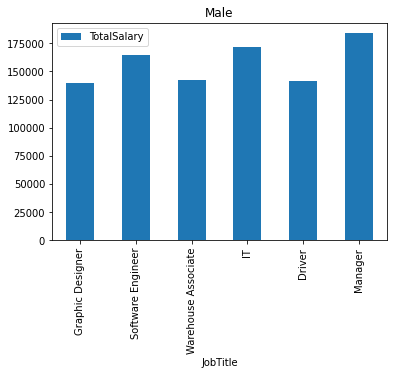

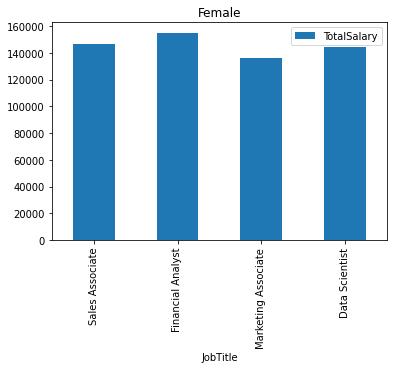

In [21]:
dfProf[dfProf.Gender =='Male'].plot(kind='bar',x='JobTitle', y='TotalSalary', title ='Male',)
dfProf[dfProf.Gender =='Female'].plot(kind='bar',x='JobTitle', y='TotalSalary', title ='Female')

## overall distribution of job title 

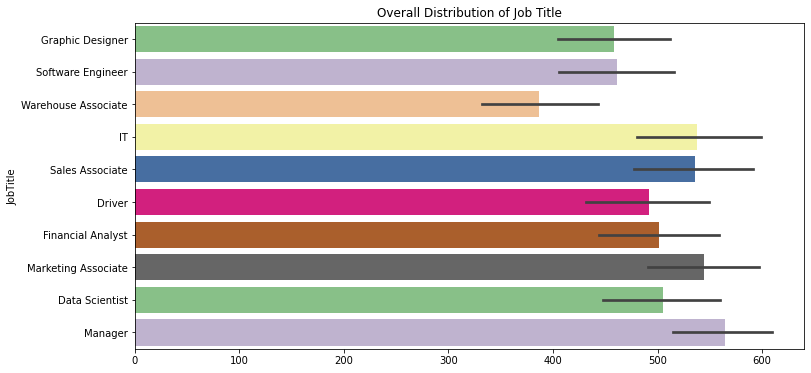

In [22]:
plt.figure(figsize=(12,6)) 
plt.title('Overall Distribution of Job Title') 
sns.barplot(x = NewData.JobTitle.index, y = NewData.JobTitle, palette='Accent');

In [23]:
newdataGenderPay = NewData.groupby("JobTitle").get_group("Data Scientist")
newdataGenderPay = newdataGenderPay.groupby("Gender").mean()
newdataGenderPay

,Age,PerfEval,Seniority,BasePay,Bonus,TotalSalary
Gender,,,,,,
Female,43.000000,3.037736,3.037736,95704.792453,6747.471698,102452.264151
Male,39.796296,2.907407,2.870370,89222.629630,6227.370370,95450.000000


In [24]:
newdataGenderPay = NewData.groupby("JobTitle").get_group("Software Engineer")
newdataGenderPay = newdataGenderPay.groupby("Gender").mean()
newdataGenderPay

,Age,PerfEval,Seniority,BasePay,Bonus,TotalSalary
Gender,,,,,,
Female,37.000000,2.750000,2.375000,94701.000000,6446.375000,101147.375000
Male,41.178218,3.158416,2.970297,106371.485149,6662.326733,113033.811881


In [25]:
newdataGenderPay = NewData.groupby("JobTitle").get_group("IT")
newdataGenderPay = newdataGenderPay.groupby("Gender").mean()
newdataGenderPay

,Age,PerfEval,Seniority,BasePay,Bonus,TotalSalary
Gender,,,,,,
Female,42.900000,3.080000,2.840000,90475.720000,6362.220000,96837.940000
Male,41.413043,3.173913,2.913043,91021.978261,6217.608696,97239.586957


In [26]:
#Checking the gender for maximum pay for all professions 
dfProf = pd.DataFrame(columns=["JobTitle", "BasePay", "Gender", "Bonus"])
for profName in uniqueProf:
    dfGD = NewData.loc[(NewData.JobTitle == profName), ["JobTitle", "BasePay", "Gender", "Bonus"]]
    dfMen = dfGD.loc[(dfGD.Gender == "Male"), ["JobTitle", "BasePay", "Gender", "Bonus"]]
    dfWomen = dfGD.loc[(dfGD.Gender == "Female"), ["JobTitle", "BasePay", "Gender", "Bonus"]]
    dfProf = dfProf.append(dfMen[dfMen.BasePay == dfMen.BasePay.max()])
    dfProf = dfProf.append(dfWomen[dfWomen.BasePay == dfWomen.BasePay.max()])
    
dfProf

,JobTitle,BasePay,Gender,Bonus
874,Graphic Designer,135512,Male,3955
697,Graphic Designer,133741,Female,4925
869,Software Engineer,160460,Male,2930
781,Software Engineer,117131,Female,2324
295,Warehouse Associate,133927,Male,8278
756,Warehouse Associate,134109,Female,4184
609,IT,165229,Male,6506
592,IT,132267,Female,5679
805,Sales Associate,136209,Male,3910
929,Sales Associate,142505,Female,4214


In [27]:
#Checking the gender for maximum pay for all professions 
dfProf = pd.DataFrame(columns=["JobTitle", "BasePay", "Gender", "Bonus", "TotalSalary"])
for profName in uniqueProf:
    dfGD = NewData.loc[(NewData.JobTitle == profName), ["JobTitle", "BasePay", "Gender", "Bonus","TotalSalary"]]
    dfMen = dfGD.loc[(dfGD.Gender == "Male"), ["JobTitle", "BasePay", "Gender", "Bonus","TotalSalary"]]
    dfWomen = dfGD.loc[(dfGD.Gender == "Female"), ["JobTitle", "BasePay", "Gender", "Bonus","TotalSalary"]]
    dfProf = dfProf.append(dfMen[dfMen.TotalSalary == dfMen.TotalSalary.max()])
    dfProf = dfProf.append(dfWomen[dfWomen.TotalSalary == dfWomen.TotalSalary.max()])
    
dfProf

,JobTitle,BasePay,Gender,Bonus,TotalSalary
284,Graphic Designer,132873,Male,7266,140139
697,Graphic Designer,133741,Female,4925,138666
350,Software Engineer,157852,Male,6669,164521
347,Software Engineer,112491,Female,8727,121218
295,Warehouse Associate,133927,Male,8278,142205
756,Warehouse Associate,134109,Female,4184,138293
609,IT,165229,Male,6506,171735
592,IT,132267,Female,5679,137946
126,Sales Associate,135013,Male,8972,143985
929,Sales Associate,142505,Female,4214,146719


<AxesSubplot:xlabel='Education', ylabel='TotalSalary'>

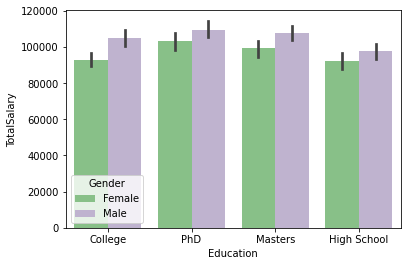

In [28]:
#Let us see if education makes a significant difference in the basepay between males and females 
sns.barplot(data = NewData, x= 'Education', y = 'TotalSalary', hue = 'Gender', palette = "Accent")

<AxesSubplot:xlabel='BasePay', ylabel='JobTitle'>

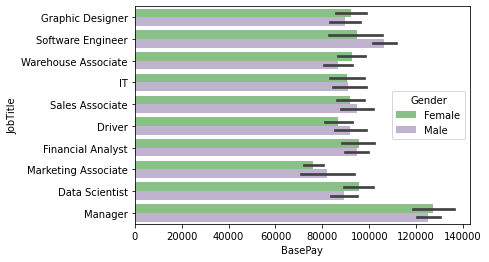

In [29]:
#Basepay comparision for each profession according to gender
sns.barplot(y="JobTitle", hue="Gender", x="BasePay",
            palette="Accent", orient = "h",
            data=NewData)

<AxesSubplot:xlabel='TotalSalary', ylabel='JobTitle'>

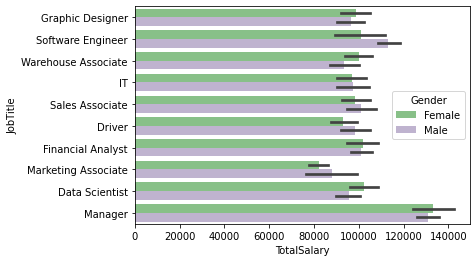

In [30]:
#TotalSalary comparision for each profession according to gender
sns.barplot(y="JobTitle", hue="Gender", x="TotalSalary",
            palette="Accent", orient = "h",
            data=NewData)

<AxesSubplot:xlabel='Bonus', ylabel='JobTitle'>

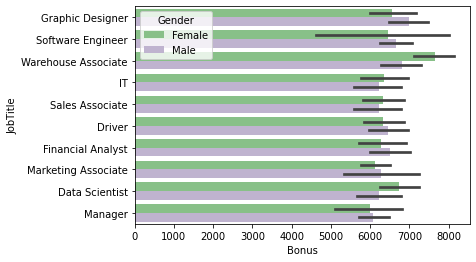

In [31]:
#Bonus  comparision for each profession according to gender
sns.barplot(y="JobTitle", hue="Gender", x="Bonus",
            palette="Accent", orient = "h",
            data=NewData)

In [37]:
female = NewData[NewData['Gender'] == 'Female'].groupby('JobTitle').sum()
male = NewData[NewData['Gender'] == 'Male'].groupby('JobTitle').sum()


In [39]:
fig = go.Figure(data=[
    go.Bar(name='Difference', x=female.index, y= male['TotalSalary'] - female['TotalSalary'])
])
# Change the bar mode
fig.update_layout(barmode='group', title='TotalSalary [Male - Female]')
fig.show()

In [41]:
diff = (male['TotalSalary'] - female['TotalSalary']).tolist()
titles = male.index.tolist()

for i in range(len(diff)):
    if diff[i] > 0:
        print('Men make ' + str(int(diff[i])) + ' more than Women as a ' + titles[i])
    else:
        print('Men make ' + str(int(-diff[i])) + ' less than Women as a ' + titles[i])

Men make 275670 less than Women as a Data Scientist
Men make 141723 more than Women as a Driver
Men make 879310 more than Women as a Financial Analyst
Men make 86304 more than Women as a Graphic Designer
Men make 368876 less than Women as a IT
Men make 7028502 more than Women as a Manager
Men make 7831095 less than Women as a Marketing Associate
Men make 922088 more than Women as a Sales Associate
Men make 10607236 more than Women as a Software Engineer
Men make 495862 less than Women as a Warehouse Associate


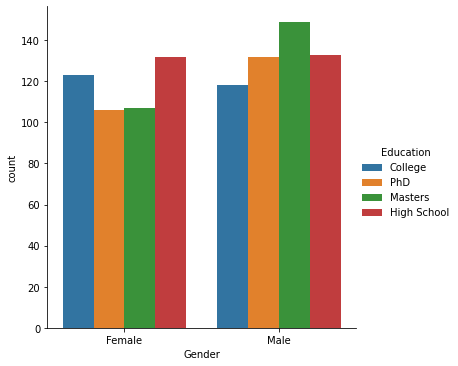

In [42]:
sns.catplot(x="Gender", hue="Education", kind="count", data=NewData)